# Logistic Regression

#### Consider binary output and denote the probability of an output of 1 as: $p = P(Y=1)$ for $0 < p < 1$

#### Then the odd of this probability is: $\frac{p}{1-p}$ .

#### Let the base of the logarithm be $b=e$, the log-odd then is: $logit(p) = ln(\frac{p}{1-p})$

#### Use a linear predictor function: $ln(\frac{p}{1-p}) = w_{0} + w_{1}x_{1} + w_{2}x_{2} .. \Leftrightarrow  \frac{p}{1-p} = e^{w^{T}x}$

#### Determine probability of output 1 as: $p = P(Y=1) = \frac{1}{1 + e^{-w^{T}x}}$

#### With a given linear model $z = w^{T}x$ this formula represents the sigmoid function: $\sigma(z)=\frac{e^{z}}{e^{z} - 1} =\frac{1}{1+e^{-z}}$

Note: This was simplified. The full linear model still has a bias such that: $z = w_0 + w^{T}x = w_{0} + \sum_{i=1}^{m}w_{i}x_{i}$. To keep things clean it was not considered in this example

#### Goal: find best parameters $w0, w1, w2, ...$ of this model (model fitting)

#### The logistic regression model output is $\hat{y} = \sigma(z) = \sigma(w^{T}x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1337)

#### Plot the sigmoid function

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

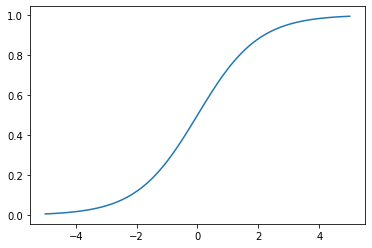

In [3]:
x_val = np.linspace(-5,5,100)
plt.plot(x_val,sigmoid(x_val))
plt.show()

#### Run an example model

In [4]:
num_samples = 200 # number N of samples. We will calculate N different z values, one for each sample
num_dim = 2 # model dimension (2d data here)

In [5]:
x = np.random.randn(num_samples,num_dim) #some data of any form. Here: noise
x.shape
# Note that we didn't add the bias w_0 here.
# It can be easily done by adding one column to the left of x and initalize it with a value, e.g. ones!

(200, 2)

In [6]:
w = np.random.randn(num_dim)
w.shape,w

((2,), array([-0.37523099,  0.80430086]))

In [7]:
z = x.dot(w)
z.shape

(200,)

#### Binary classification example

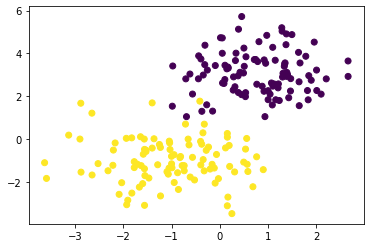

In [8]:
# make some new data and weights
x = np.random.randn(num_samples,num_dim) #some data of any form. Here: noise
w = np.random.randn(num_dim)

# shape our data to something binary classifiable. Here: two clouds
x[:int(num_samples/2)] = x[:int(num_samples/2)] + [1,3]
x[int(num_samples/2):] = x[int(num_samples/2):] + [-1,-1]

# Create targets/labels/real classes/ground truth however you like to call it :)
t = np.array([0]*int(num_samples/2) + [1]*int(num_samples/2))

# plot
plt.scatter(x[:,0],x[:,1],c=t)

In [9]:
# Generate model output predictions (remember our weights are still random initialized and not trained)
z = x.dot(w)
y = sigmoid(z)

# Look at some predictions
y[0:20]

array([0.75725893, 0.92308937, 0.91637066, 0.62480896, 0.84410344,
       0.93483018, 0.91327288, 0.84967773, 0.90274976, 0.84117424,
       0.91132058, 0.84959823, 0.47164741, 0.70184994, 0.80834556,
       0.94924071, 0.84866335, 0.48478826, 0.76699216, 0.85261655])

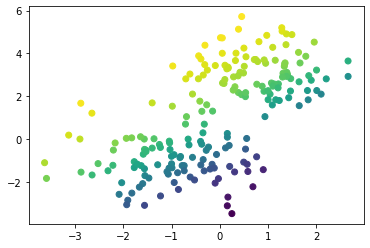

In [10]:
# Let's plot it
plt.scatter(x[:,0],x[:,1],c=y)

Since the sigmoid gives us class probabilites we didn't decide on the classes yet.

Let's add a decision boundary that sharply cuts this data into two

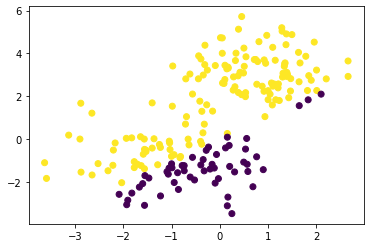

In [11]:
thresh = 0.5
predicted_classes = np.copy(y)
predicted_classes[predicted_classes<=thresh]=0
predicted_classes[predicted_classes>thresh]=1

#Plot again
plt.scatter(x[:,0],x[:,1],c=predicted_classes)

This isn't the correct classification (in most cases, unless the random initialization got lucky)

So we have to calculate the loss of this set of predictions and optimize the weights according to it

#### Cross entropy loss

based on negative log-likelihood $\Rightarrow$ minimizing this loss function is equivalent to maximum log-likelihood.

With $\hat{y}_k \in (\hat{y},1-\hat{y})$ as the model classification and $t_k \in (l,1-l)$ as the real class label, the cross entropy loss for binary classification is:

### $J := J(\hat{y}_k,t_k) = -\sum_k t_k log(\hat{y}_k) = -l~log(\hat{y}) - (1-l) log(1-\hat{y})$

Note that if the true label is one ($l=1$) then $J = -log(\hat{y})$

And if it is zero ($l=0$) then $J = -log(1-\hat{y})$

In [12]:
#Additional:
# With N samples (batch learning) you get:
### $J(w) = -\frac{1}{N}\sum_n\sum_k t_{nk} log(\hat{y}_{nk}) = -\frac{1}{N} \sum_n (l_{n} log(\hat{y}_{n}) + (1 - l_{n}) log(1 - \hat{y}_{n}))$

In [13]:
def binary_cross_entropy(targets,predictions):
    error = 0
    for i in range(targets.shape[0]):
        if targets[i] == 1:
            error = error - np.log(predictions[i])
        if targets[i] == 0:
            error = error - np.log(1 - predictions[i])
    return error / targets.shape[0] #Normalize for number of samples

In [14]:
print(binary_cross_entropy(targets=t,predictions=y))

1.2811062498359953


#### Updating weights with gradient descent

### $w^{(\tau)}_i = w^{(\tau-1)}_i - \eta \frac{\partial J(w)}{\partial w^{(\tau-1)}_i}$

First consider the case of the label being one ($l=1$). Then

### $J(w) = -log(\hat{y}) = -log(\sigma(w^{T}x)) = -log(\sigma(w_{0}+ w_{1}x_{1} + w_{2}x_{2} .. ))$

The derivative of the sigmoid is:

### $\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))$

The derivative of the cost function then is (sorry. it's too much typing and not that hard after all. Look into the links below for the derivation): 

### $\frac{\partial J(w)}{\partial w_i} = \frac{\partial J(w)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial w_i} =~...~= (\hat{y}-l)x_i$

In [15]:
learning_rate = 0.1
num_steps = 10

In [16]:
print('cross entropy before: {}'.format(binary_cross_entropy(targets=t,predictions=y)))
for i in range(num_steps):
    # gradient descent
    w = w - learning_rate*x.T.dot(y-t)
    # next time step/ calculate model prediction
    y = sigmoid(x.dot(w))
    print('cross entropy after step {} = {}'.format(i+1,binary_cross_entropy(targets=t,predictions=y)))

cross entropy before: 1.2811062498359953
cross entropy after step 1 = 0.9263778991410893
cross entropy after step 2 = 0.859975081000937
cross entropy after step 3 = 0.7936118106140829
cross entropy after step 4 = 0.7276501045667316
cross entropy after step 5 = 0.6667174957367341
cross entropy after step 6 = 0.6205719165851097
cross entropy after step 7 = 0.5806019149969891
cross entropy after step 8 = 0.5431576075977975
cross entropy after step 9 = 0.5145312725343261
cross entropy after step 10 = 0.49457424103230685


#### Plot results

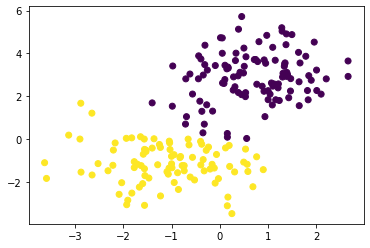

In [17]:
thresh = 0.5
predicted_classes = np.copy(y)
predicted_classes[predicted_classes<=thresh]=0
predicted_classes[predicted_classes>thresh]=1

#Plot again
plt.scatter(x[:,0],x[:,1],c=predicted_classes)

HOOORAY!

### Further reading;

https://en.wikipedia.org/wiki/Logistic_regression
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

# Multinomial Logistic Regression

#### also called 'softmax regression'

#### no binary classification, but instead multiple classes are possible. Let the number of classes be K.

#### The probability of class i can be calculated by using the softmax function: $softmax_i(z)=\frac{e^{z_i}}{\sum{j=1}^{k}e^{z_j}}$

Note, that these probabilites add up to 100% over all classes

#### For the derivative of the cross-entropy functions for softmax regression it is again refered to the literature.

In fact, we can use the same simple gradient descent as before but account for the multiclass reression by one-hot-encoding the labels (see below)

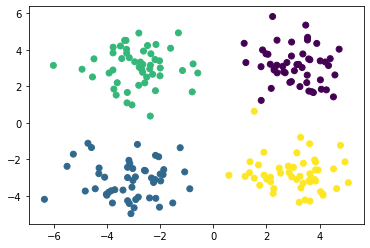

In [18]:
num_samples = 200 # number N of samples. We will calculate N different z values, one for each sample
num_dim = 2 # model dimension (2d data here)
num_classes = 4

# make some new data and weights
x = np.random.randn(num_samples,num_dim) #some data of any form. Here: noise

# four clouds
x[:int(num_samples/4)] = x[:int(num_samples/4)] + [3,3]
x[int(num_samples/4):int(2*num_samples/4)] = x[int(num_samples/4):int(2*num_samples/4)] + [-3,-3]
x[int(2*num_samples/4):int(3*num_samples/4)] = x[int(2*num_samples/4):int(3*num_samples/4)] + [-3,+3]
x[int(3*num_samples/4):int(4*num_samples/4)] = x[int(3*num_samples/4):int(4*num_samples/4)] + [3,-3]

#Let's add a bias this time (this actually isn't "x" anymore after adding the bias. keep that in mind)
bias = np.ones((num_samples, 1))
x = np.concatenate((bias, x), axis=1)
w = np.random.randn(num_dim+1, num_classes) #add one "dimension" for the model because of the bias


# Create targets/labels/real classes/ground truth however you like to call it :)
t = np.array([0]*int(num_samples/4) + [1]*int(num_samples/4) + [2]*int(num_samples/4) + [3]*int(num_samples/4))

# plot
plt.scatter(x[:,1],x[:,2],c=t)

In [19]:
x.shape, w.shape

((200, 3), (3, 4))

In [20]:
def softmax(z):
    """computes softmax of z with z.shape=(n_samples,n_classes)"""
    if type(z) != np.ndarray:
        z = np.array(z)
    return (np.exp(z.T) / np.sum(np.exp(z.T),axis=0)).T

In [21]:
z = x.dot(w)
y = softmax(z)

In [22]:
#Let's have a look at some of the class predictions
y[0]

array([8.22877175e-01, 1.31631029e-01, 6.44682565e-04, 4.48471138e-02])

In [23]:
# the softmax values add up to 1 ! :) So we implemented it correctly
np.sum(y[0])

1.0

In [24]:
# Let's make a few quicks test to get a feeling of this function

print('Some scaled values')
print(softmax([1,2,5]))
print(softmax([1*10,2*10,5*10]))
print(softmax([1/100,2/100,5/100]))

print('\nSome shifted values')
print(softmax([1,2,5]))
print(softmax([1-5,2-5,5-5]))
print(softmax([1+50,2+50,5+50]))
# print(softmax([1+5000,2+5000,5+5000])) #[nan nan nan]

Some scaled values
[0.01714783 0.04661262 0.93623955]
[4.24835426e-18 9.35762297e-14 1.00000000e+00]
[0.32777633 0.33107054 0.34115313]

Some shifted values
[0.01714783 0.04661262 0.93623955]
[0.01714783 0.04661262 0.93623955]
[0.01714783 0.04661262 0.93623955]


High exponential values can easily reach NaN values.

Because the softmax function is shift-invariant,
we can shift these z-values close to zero and thus, making softmax numerically more stable

In [25]:
def stable_softmax(z):
    if type(z) != np.ndarray:
        z = np.array(z)
    _z = z - np.max(z) #shifted z
    return (np.exp(_z.T) / np.sum(np.exp(_z.T),axis=0)).T

In [26]:
# Let's see if we can get a not-NaN value now
print(stable_softmax([1+5000,2+5000,5+5000]))

[0.01714783 0.04661262 0.93623955]


In [27]:
#Calculate the model output again and see that it's still the same. It's just a bit more bulletproof
z = x.dot(w)
y = softmax(z)
y[0],np.sum(y[0])

(array([8.22877175e-01, 1.31631029e-01, 6.44682565e-04, 4.48471138e-02]), 1.0)

In [28]:
# now do this function again but for any amount of classes (not only binary)
def cross_entropy(targets,predictions):
    N = targets.shape[0]
    error = -1/N * np.sum(np.log(predictions[range(N),targets]))
    return error

In [29]:
cross_entropy(targets=t,predictions=y)

4.952523481304677

Let's visualize this by plotting the datapoints with the assumed classes

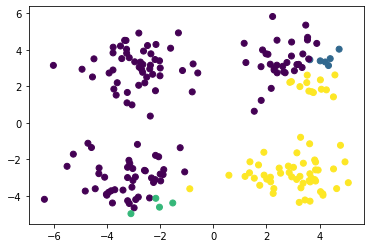

In [30]:
classification = y.argmax(axis=1)
plt.scatter(x[:,1],x[:,2],c=classification)

This isn't correct. Again, we didn't train yet! Let's do it now!

In [31]:
#Create one-hot encoding of labels, e.g.[2] -> [0,0,1,0]
def to_one_hot(labels):
    n = labels.shape[0]
    oh = np.zeros([n,labels.max()+1])
    for i in range(n):
        oh[i,labels[i]] = 1
    return oh

In [32]:
print(t[0])
labels_one_hot = to_one_hot(t)
print(labels_one_hot[0])

0
[1. 0. 0. 0.]


In [33]:
learning_rate = 0.1
num_steps = 10

In [34]:
x.T.dot(y-labels_one_hot).shape

(3, 4)

In [35]:
print('cross entropy before: {}'.format(cross_entropy(targets=t,predictions=y)))
for i in range(num_steps):
    # gradient descent
    w = w - learning_rate*x.T.dot(y-labels_one_hot)
    # next time step/ calculate model prediction
    y = sigmoid(x.dot(w))
    print('cross entropy after step {} = {}'.format(i+1,cross_entropy(targets=t,predictions=y)))

cross entropy before: 4.952523481304677
cross entropy after step 1 = 0.008592476447290024
cross entropy after step 2 = 0.6172272175929385
cross entropy after step 3 = 0.049221406472708916
cross entropy after step 4 = 0.059239610200778704
cross entropy after step 5 = 0.11946552173206523
cross entropy after step 6 = 0.18007558608222712
cross entropy after step 7 = 0.32050113656333473
cross entropy after step 8 = 0.43645269964184336
cross entropy after step 9 = 0.5823285361319755
cross entropy after step 10 = 0.6078856428832425


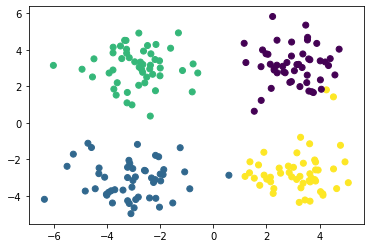

In [36]:
classification = y.argmax(axis=1)
plt.scatter(x[:,1],x[:,2],c=classification)

### Further reading;

https://en.wikipedia.org/wiki/Multinomial_logistic_regression

https://deepnotes.io/softmax-crossentropy

https://madalinabuzau.github.io/2016/11/29/gradient-descent-on-a-softmax-cross-entropy-cost-function.html

https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/